In [1]:
#Load the dataset
import pandas as pd
forest_data = pd.read_csv('C:/Users/clare/Downloads/Machine Learning/Assignment/forestdata.csv')

#Display the first few rows of the dataframe to understand its structure and types of data it contains
forest_data.head()

,collector.id,c.score,l.score,rain,tree.age,surface.litter,wind.intensity,humidity,tree.density,month,time.of.day,fire
0,5,13.11,3.421591,0.477187,34.66,6.718047,3.335635,52.0,0.69860,8,afternoon,1
1,7,11.99,2.874611,0.212425,19.39,6.242029,3.127024,59.0,0.62020,4,morning,0
2,6,12.91,2.827774,0.118141,15.75,6.397929,3.052446,60.0,0.58235,10,night,0
3,5,12.06,2.772961,0.097565,13.25,6.278146,3.114239,60.0,0.57025,9,afternoon,1
4,2,15.06,3.271684,0.438121,47.14,6.932448,3.214831,51.0,0.71150,7,morning,1


In [2]:
# Get a concise summary of the dataframe, including the data types and non-null values
print(forest_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   collector.id    456 non-null    int64  
 1   c.score         456 non-null    float64
 2   l.score         455 non-null    float64
 3   rain            455 non-null    float64
 4   tree.age        455 non-null    float64
 5   surface.litter  456 non-null    float64
 6   wind.intensity  455 non-null    float64
 7   humidity        453 non-null    float64
 8   tree.density    456 non-null    float64
 9   month           456 non-null    int64  
 10  time.of.day     456 non-null    object 
 11  fire            456 non-null    int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 42.9+ KB
None


In [3]:
# Display statistical summary of numeric columns
print(forest_data.describe())

       collector.id      c.score     l.score        rain    tree.age  \
count    456.000000   456.000000  455.000000  455.000000  455.000000   
mean       5.730263    22.857656    3.010865    0.245926   41.681767   
std        2.921622   130.770478    0.317467    0.200932   49.059173   
min        1.000000     6.981000    2.718282    0.000000    6.802000   
25%        3.000000    11.697500    2.796446    0.095999   17.740000   
50%        6.000000    13.275000    2.888364    0.165706   24.600000   
75%        8.000000    16.040000    3.123109    0.380691   45.410000   
max       11.000000  1990.200000    4.629025    1.000000  542.200000   

       surface.litter  wind.intensity    humidity  tree.density       month  \
count      456.000000      455.000000  453.000000    456.000000  456.000000   
mean         6.623185        3.132817   56.231788      0.613652    6.732456   
std          0.563944        0.081336    6.122037      0.067054    3.429465   
min          5.221436        2.9263

In [4]:
# Check for missing values in each column
print(forest_data.isnull().sum())

collector.id      0
c.score           0
l.score           1
rain              1
tree.age          1
surface.litter    0
wind.intensity    1
humidity          3
tree.density      0
month             0
time.of.day       0
fire              0
dtype: int64


In [5]:
# Display data types of each column
print(forest_data.dtypes)

collector.id        int64
c.score           float64
l.score           float64
rain              float64
tree.age          float64
surface.litter    float64
wind.intensity    float64
humidity          float64
tree.density      float64
month               int64
time.of.day        object
fire                int64
dtype: object


In [6]:
# Example for a categorical column named 'time.of.day'
print(forest_data['time.of.day'].unique())

['afternoon' 'morning' 'night' 'morni7ng']


In [7]:
# For each column, check the number of unique values to identify potential categorical variables
for col in forest_data.columns:
    print(f"{col}: {forest_data[col].nunique()} unique values")

collector.id: 11 unique values
c.score: 385 unique values
l.score: 432 unique values
rain: 434 unique values
tree.age: 426 unique values
surface.litter: 440 unique values
wind.intensity: 345 unique values
humidity: 32 unique values
tree.density: 401 unique values
month: 12 unique values
time.of.day: 4 unique values
fire: 2 unique values


In [8]:
# Check variance of each numeric variable
print(forest_data.var())

collector.id          8.535873
c.score           17100.918002
l.score               0.100785
rain                  0.040374
tree.age           2406.802496
surface.litter        0.318033
wind.intensity        0.006616
humidity             37.479341
tree.density          0.004496
month                11.761230
fire                  0.233198
dtype: float64


C:\Users\clare\AppData\Local\Temp\ipykernel_26924\279426558.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(forest_data.var())


In [9]:
# Correlation matrix for numeric variables
print(forest_data.corr())

                collector.id   c.score   l.score      rain  tree.age  \
collector.id        1.000000 -0.050264 -0.007252  0.004176 -0.001664   
c.score            -0.050264  1.000000  0.010255  0.012243 -0.009639   
l.score            -0.007252  0.010255  1.000000  0.905248  0.637844   
rain                0.004176  0.012243  0.905248  1.000000  0.693742   
tree.age           -0.001664 -0.009639  0.637844  0.693742  1.000000   
surface.litter      0.017166  0.015894  0.653907  0.818463  0.708016   
wind.intensity      0.014691 -0.040875  0.431780  0.468918  0.135609   
humidity            0.070920  0.009082 -0.676025 -0.607190 -0.251645   
tree.density        0.006196  0.013457  0.824831  0.917459  0.551867   
month               0.040819 -0.000791  0.085508  0.122157  0.118422   
fire                0.003607 -0.031894  0.564577  0.684050  0.501015   

                surface.litter  wind.intensity  humidity  tree.density  \
collector.id          0.017166        0.014691  0.070920     

C:\Users\clare\AppData\Local\Temp\ipykernel_26924\3236682381.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(forest_data.corr())


C:\Users\clare\AppData\Local\Temp\ipykernel_26924\2620069479.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = forest_data.corr()


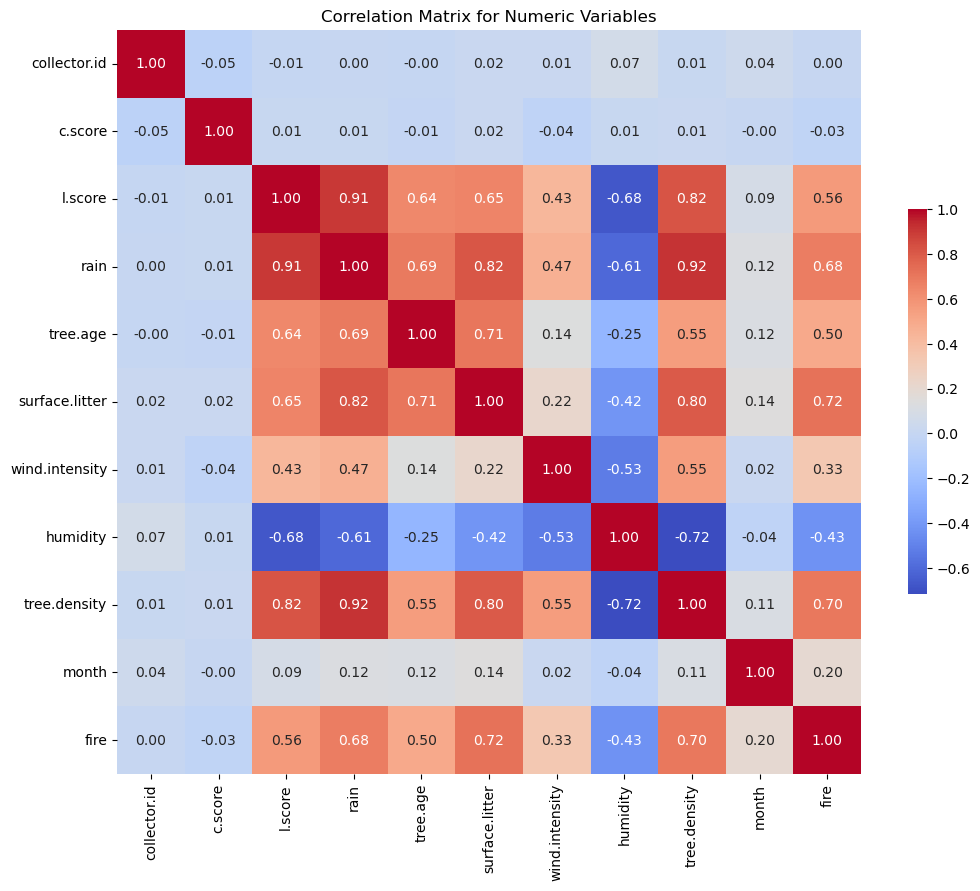

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = forest_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix for Numeric Variables')
plt.show()

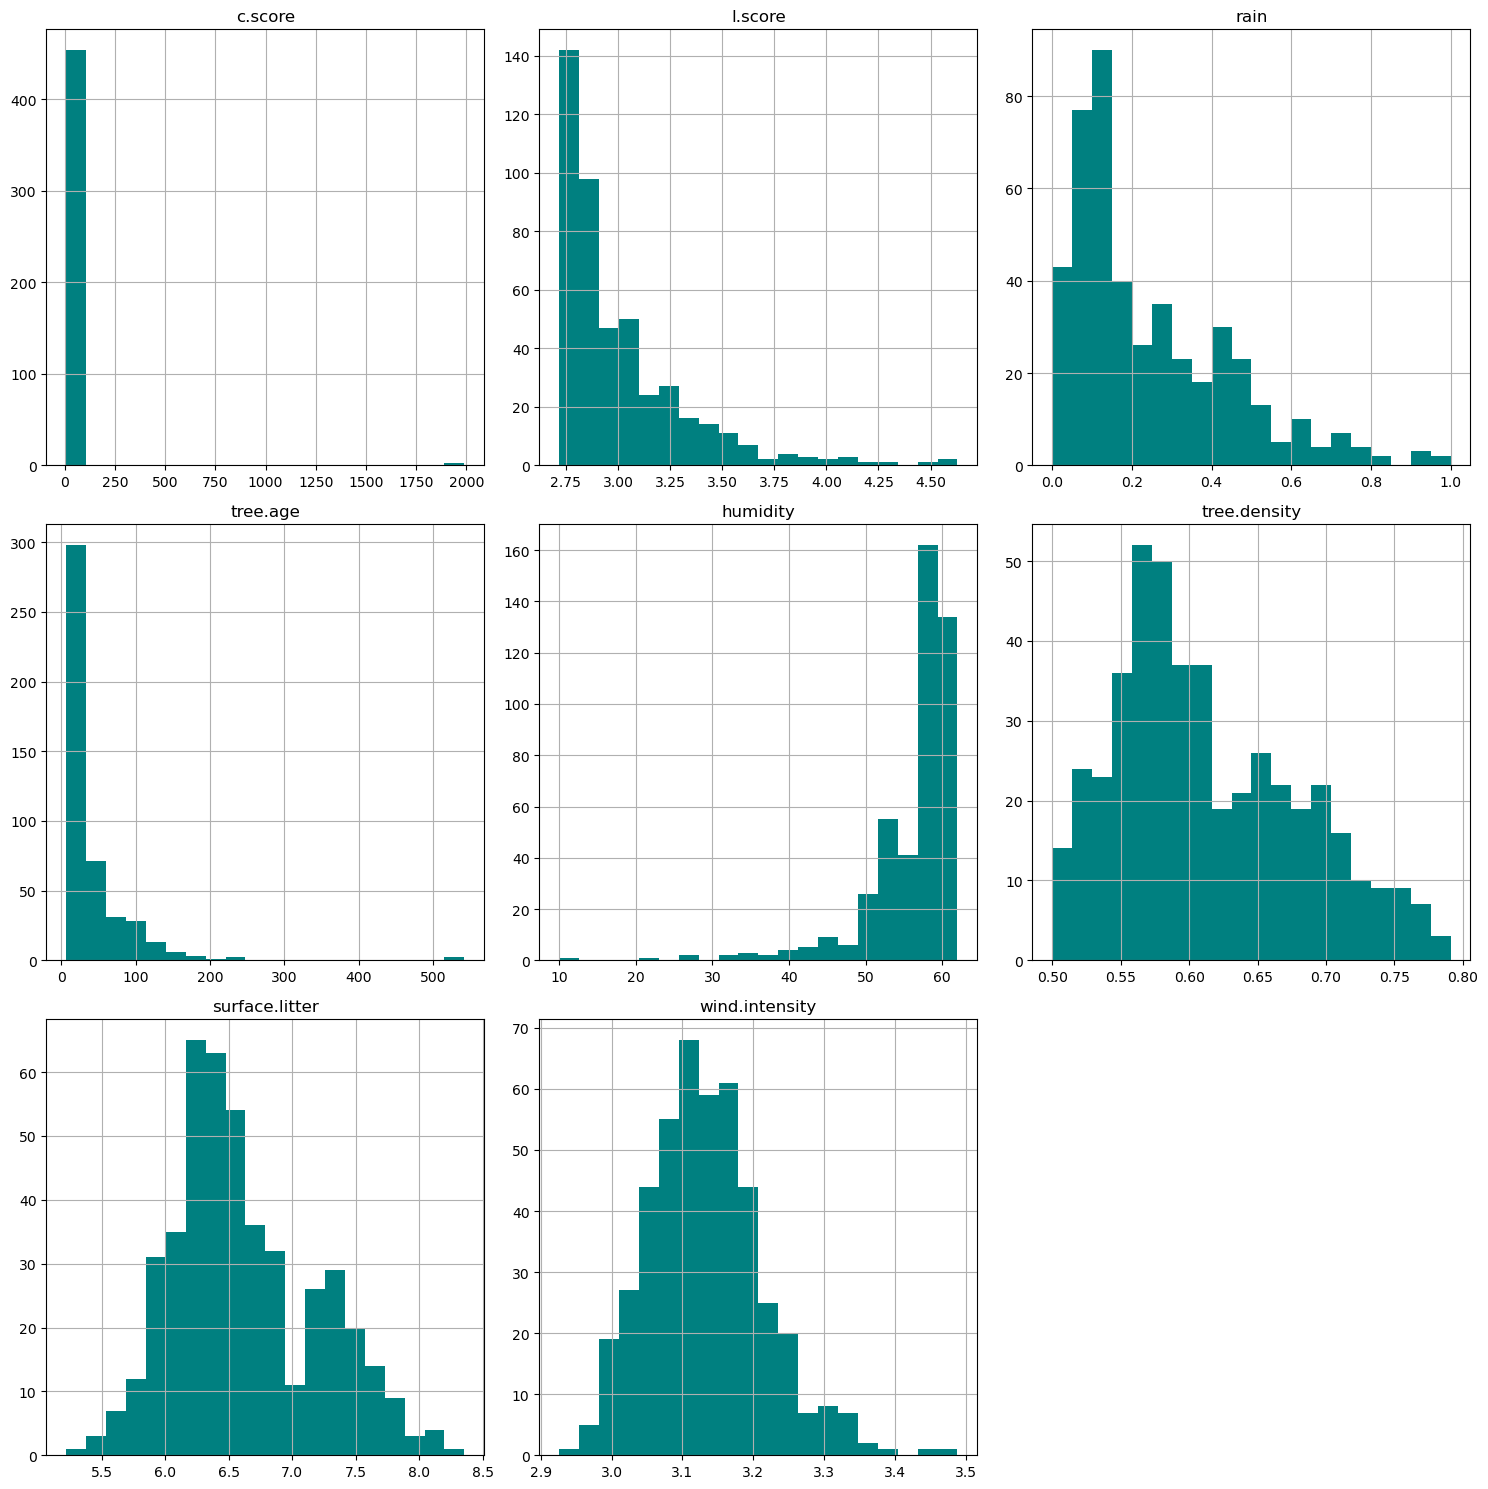

In [11]:
import matplotlib.pyplot as plt

# Selecting columns for histogram plotting
columns_to_plot = ['c.score', 'l.score', 'rain', 'tree.age', 'humidity', 'tree.density', 'surface.litter', 'wind.intensity']

# Plotting histograms for selected columns
plt.figure(figsize=(15, 15))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    forest_data[column].hist(bins=20, color='teal')
    plt.title(column)

plt.tight_layout()
plt.show()


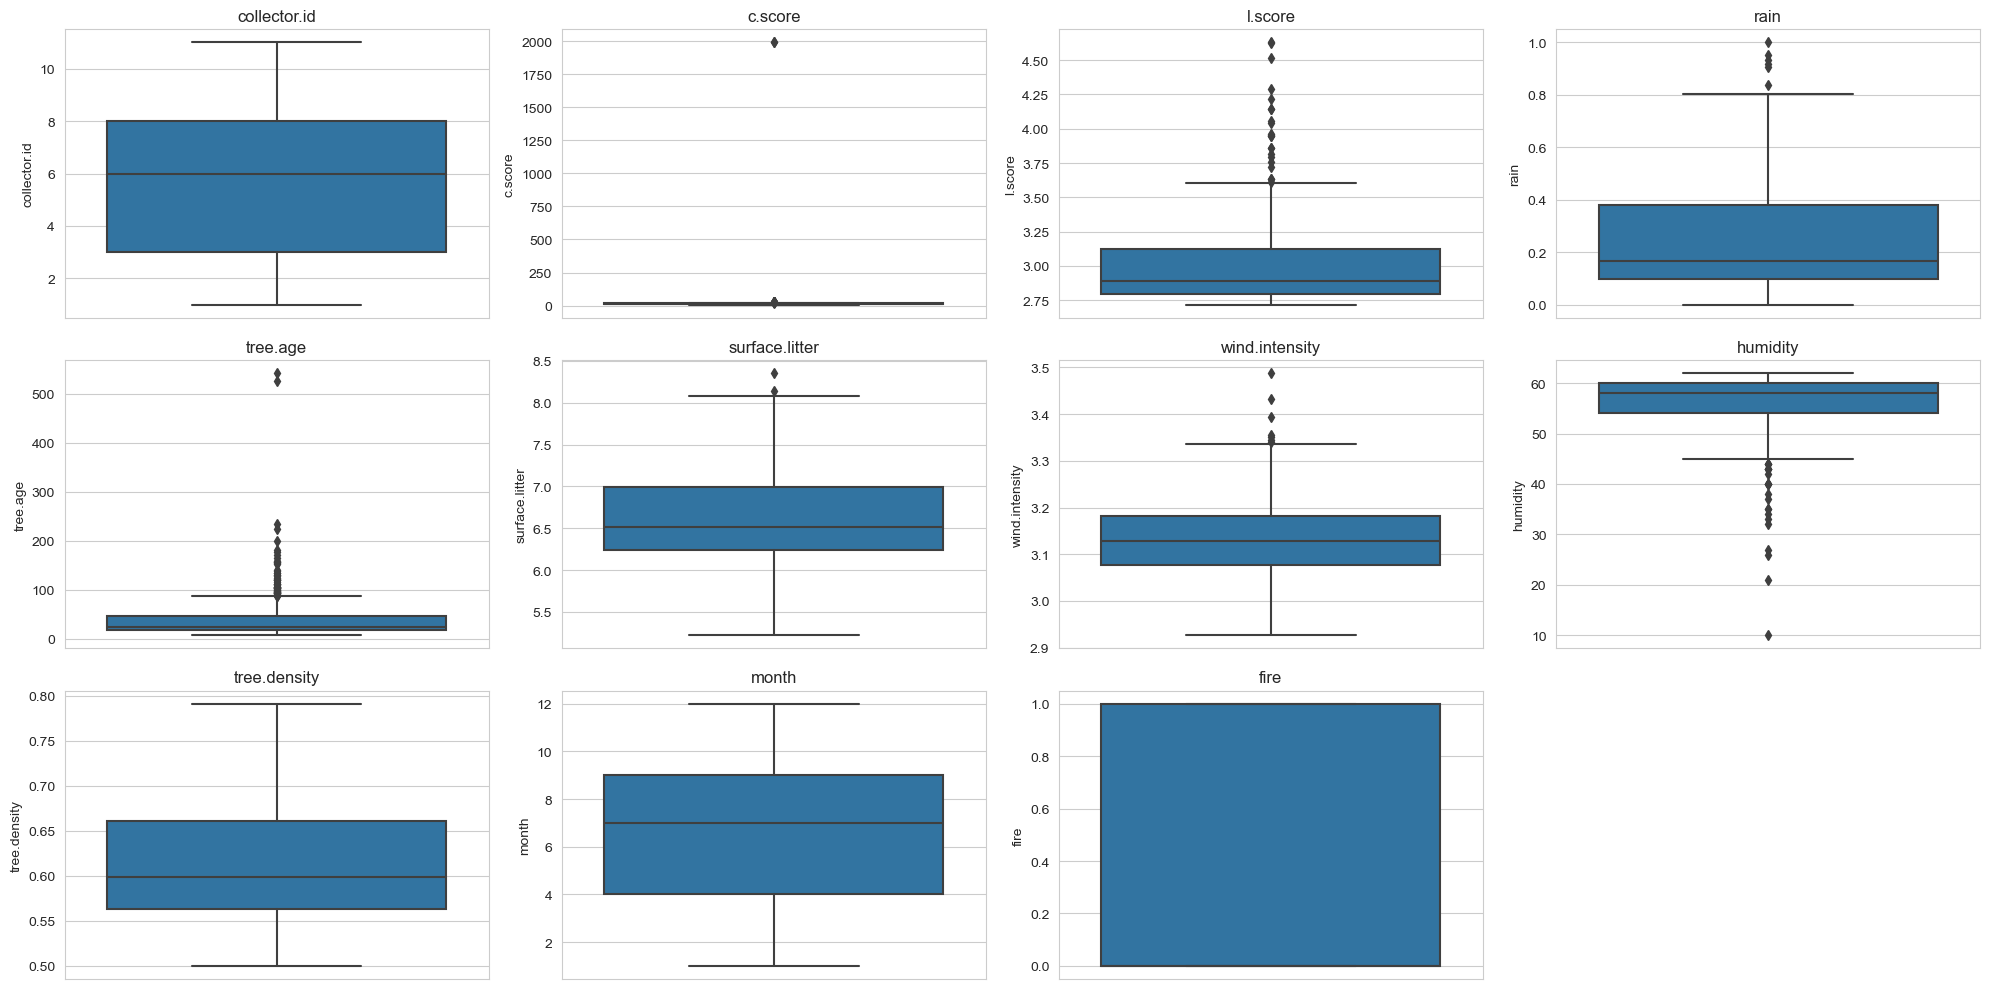

In [12]:
# Importing matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating box plots for all numerical variables
numerical_features = forest_data.select_dtypes(include=['float64', 'int64']).columns

# Plotting
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=forest_data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [13]:
# Check balance of the target variable
print(forest_data['fire'].value_counts(normalize=True))

0    0.631579
1    0.368421
Name: fire, dtype: float64


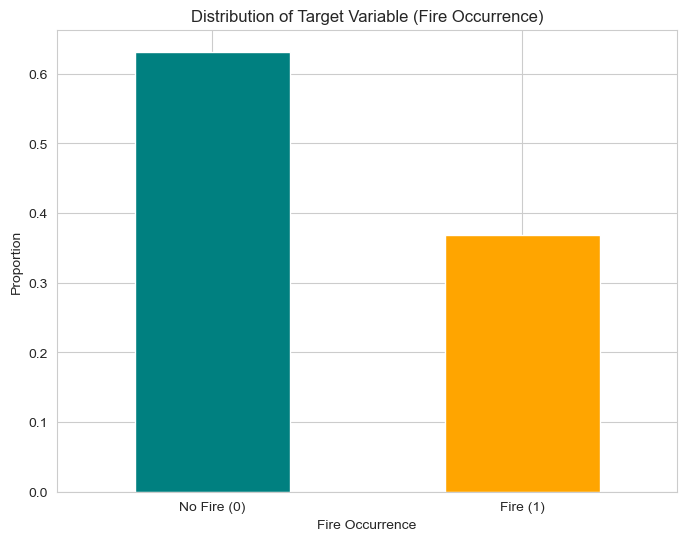

In [14]:
import matplotlib.pyplot as plt

# Assuming forest_data['fire'] contains your target variable
fire_counts = forest_data['fire'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
fire_counts.plot(kind='bar', color=['teal', 'orange'])
plt.title('Distribution of Target Variable (Fire Occurrence)')
plt.xlabel('Fire Occurrence')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['No Fire (0)', 'Fire (1)'], rotation=0)
plt.show()


In [15]:
forest_data = forest_data.drop('collector.id', axis=1)

In [16]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Remove 'collector.id' column if it's not relevant to the modeling


# Define features (X) and target (y)
X = forest_data.drop('fire', axis=1)
y = forest_data['fire']

# Split into training (60%) and temporary sets (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Further split the temporary set into validation and test sets (each 20% of the original dataset)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [17]:
from sklearn.impute import SimpleImputer

# Identify numerical columns with missing values
numerical_cols_with_missing = [col for col in X_train.columns 
                               if X_train[col].isnull().any() 
                               and pd.api.types.is_numeric_dtype(X_train[col])]

# Initialize the imputer for numerical columns
num_imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data and transform it
X_train.loc[:, numerical_cols_with_missing] = num_imputer.fit_transform(X_train[numerical_cols_with_missing])

# Transform the validation and test data using the same imputer
X_validate.loc[:, numerical_cols_with_missing] = num_imputer.transform(X_validate[numerical_cols_with_missing])
X_test.loc[:, numerical_cols_with_missing] = num_imputer.transform(X_test[numerical_cols_with_missing])

# Verification: Check if there are any missing values left
print("NaN counts in X_train after imputation:\n", X_train.isnull().sum())
print("NaN counts in X_validate after imputation:\n", X_validate.isnull().sum())
print("NaN counts in X_test after imputation:\n", X_test.isnull().sum())


NaN counts in X_train after imputation:
 c.score           0
l.score           0
rain              0
tree.age          0
surface.litter    0
wind.intensity    0
humidity          0
tree.density      0
month             0
time.of.day       0
dtype: int64
NaN counts in X_validate after imputation:
 c.score           0
l.score           1
rain              0
tree.age          0
surface.litter    0
wind.intensity    0
humidity          0
tree.density      0
month             0
time.of.day       0
dtype: int64
NaN counts in X_test after imputation:
 c.score           0
l.score           0
rain              1
tree.age          0
surface.litter    0
wind.intensity    1
humidity          0
tree.density      0
month             0
time.of.day       0
dtype: int64


In [18]:
# Calculate medians from the training data
rain_median = X_train['rain'].median()
wind_intensity_median = X_train['wind.intensity'].median()
l_score_median = X_train['l.score'].median()

# Fill NaN values in 'rain' and 'wind.intensity' in X_test with their respective medians
if 'rain' in X_test.columns:
    X_test['rain'].fillna(value=rain_median, inplace=True)
if 'wind.intensity' in X_test.columns:
    X_test['wind.intensity'].fillna(value=wind_intensity_median, inplace=True)

# Similarly, fill NaN values in 'l.score' in X_validate
if 'l.score' in X_validate.columns:
    X_validate['l.score'].fillna(value=l_score_median, inplace=True)

# Verify if the issue is resolved
print("Re-checking NaN counts in X_validate after manual imputation:\n", X_validate.isnull().sum())
print("Re-checking NaN counts in X_test after manual imputation:\n", X_test.isnull().sum())


Re-checking NaN counts in X_validate after manual imputation:
 c.score           0
l.score           0
rain              0
tree.age          0
surface.litter    0
wind.intensity    0
humidity          0
tree.density      0
month             0
time.of.day       0
dtype: int64
Re-checking NaN counts in X_test after manual imputation:
 c.score           0
l.score           0
rain              0
tree.age          0
surface.litter    0
wind.intensity    0
humidity          0
tree.density      0
month             0
time.of.day       0
dtype: int64


In [19]:
from sklearn.impute import SimpleImputer

# Initialize a new imputer for 'l.score'
l_score_imputer = SimpleImputer(strategy='median')

# Fit and transform 'l.score' in X_train to get the median value based on the training data
# Note: It's important to fit the imputer on the training data to avoid data leakage
X_train['l.score'] = l_score_imputer.fit_transform(X_train[['l.score']])

# Now, apply the fitted imputer to 'l.score' in X_validate
# This uses the median calculated from X_train['l.score'] without refitting on X_validate
X_validate['l.score'] = l_score_imputer.transform(X_validate[['l.score']])


# Confirm there are no more NaN values in 'l.score' across the datasets
print("NaN in 'l.score' after imputation in X_train:", X_train['l.score'].isnull().any())
print("NaN in 'l.score' after imputation in X_validate:", X_validate['l.score'].isnull().any())



NaN in 'l.score' after imputation in X_train: False
NaN in 'l.score' after imputation in X_validate: False


In [20]:
if X_test.isnull().any().any():
    print("NaN values still present in X_test.")
else:
    print("No NaN values present in X_test.")


No NaN values present in X_test.


In [21]:
# Check for any column still having NaN values
print("Columns with NaN values in X_validate:", X_validate.columns[X_validate.isnull().any()].tolist())


Columns with NaN values in X_validate: []


In [22]:
print("NaN values in X_test after imputation:", X_test.isnull().any().any())


NaN values in X_test after imputation: False


In [23]:
# Check for NaN values in the test set and print the count for each column
nan_counts = X_test.isnull().sum()
nan_columns = nan_counts[nan_counts > 0]

print("Count of NaN values in each column of the test set:")
print(nan_columns)


Count of NaN values in each column of the test set:
Series([], dtype: int64)


In [24]:
columns_to_check = ['tree.age', 'humidity', 'c.score', 'l.score', 'rain', 'surface.litter','wind.intensity', 'tree.density']

# Initialize a dictionary to hold the count of outliers for each column
outliers_count = {}

for col in columns_to_check:
    # Calculate the 1st and 99th percentiles for each column
    lower_bound, upper_bound = X_train[col].quantile([0.01, 0.99])
    
    # Identify outliers for the current column
    outliers = X_train[(X_train[col] < lower_bound) | (X_train[col] > upper_bound)]
    
    # Store the number of outliers found
    outliers_count[col] = len(outliers)

# Print the number of outliers found for each column
for col, count in outliers_count.items():
    if count > 0:
        print(f"Number of outliers in '{col}': {count}")
    else:
        print(f"No outliers found in '{col}'")


Number of outliers in 'tree.age': 6
Number of outliers in 'humidity': 3
Number of outliers in 'c.score': 6
Number of outliers in 'l.score': 3
Number of outliers in 'rain': 3
Number of outliers in 'surface.litter': 6
Number of outliers in 'wind.intensity': 6
Number of outliers in 'tree.density': 3


In [25]:
# Specify the columns for which you want to handle outliers
columns_to_handle = ['tree.age', 'humidity', 'c.score', 'l.score', 'rain', 'surface.litter', 'wind.intensity', 'tree.density']

# Loop over each column to calculate the bounds and clip the values
for col in columns_to_handle:
    # Calculate the 1st and 99th percentiles for each column in the training data
    lower_bound, upper_bound = X_train[col].quantile([0.01, 0.99])
    
    # Clip values in the training data at the 1st and 99th percentiles
    X_train[col] = X_train[col].clip(lower_bound, upper_bound)
    
    # It's important to apply the same clipping bounds to validation and test sets to maintain consistency
    # and avoid data leakage. These bounds are derived solely from the training data.
    X_validate[col] = X_validate[col].clip(lower_bound, upper_bound)
    X_test[col] = X_test[col].clip(lower_bound, upper_bound)

print("Outlier handling completed.")


Outlier handling completed.


In [26]:
print("NaN values in X_validate after imputation:", X_validate.isnull().any().any())


NaN values in X_validate after imputation: False


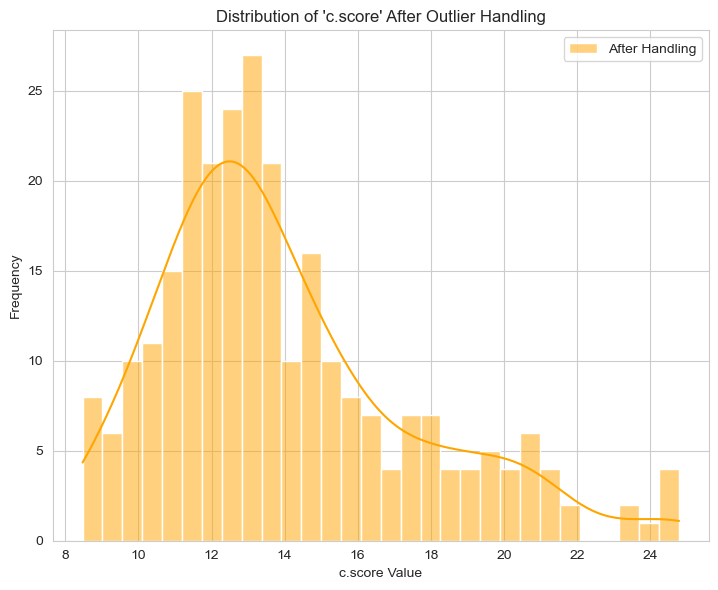

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'original_X_train' holds the original training data before outlier handling
# 'X_train' is after outlier handling has been applied
col = 'c.score'

# Plotting the distribution before and after outlier handling
plt.figure(figsize=(14, 6))

# After outlier handling
plt.subplot(1, 2, 2)
sns.histplot(X_train[col], color='orange', kde=True, bins=30, label='After Handling')
plt.title(f"Distribution of '{col}' After Outlier Handling")
plt.xlabel(f"{col} Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


In [28]:
print(X_train.columns)


Index(['c.score', 'l.score', 'rain', 'tree.age', 'surface.litter',
       'wind.intensity', 'humidity', 'tree.density', 'month', 'time.of.day'],
      dtype='object')


In [29]:
# Correcting the misspelling in all datasets
X_train['time.of.day'] = X_train['time.of.day'].replace({'morni7ng': 'morning'})
X_validate['time.of.day'] = X_validate['time.of.day'].replace({'morni7ng': 'morning'})
X_test['time.of.day'] = X_test['time.of.day'].replace({'morni7ng': 'morning'})


In [30]:
print("NaN values in X_test after imputation:", X_test.isnull().any().any())


NaN values in X_test after imputation: False


In [31]:
target_balance = y_train.value_counts(normalize=True)

target_balance

0    0.677656
1    0.322344
Name: fire, dtype: float64

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# Assuming the dataset is already loaded and split into X_train, X_validate, X_test, y_train, y_validate, y_test

# Identify numerical columns (excluding categorical columns for encoding later)
numerical_cols = X_train.columns.difference(['month', 'time.of.day'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit on the training data and transform it
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Apply the same transformation to the validation and test sets
X_validate[numerical_cols] = scaler.transform(X_validate[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [33]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'month' and 'time.of.day' are the only categorical variables needing encoding
categorical_features = ['month', 'time.of.day']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the encoder on the training data only to avoid data leakage
encoder.fit(X_train[categorical_features])

# Transform the training, validation, and test sets and convert to DataFrames
X_train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_features]), columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)
X_validate_encoded = pd.DataFrame(encoder.transform(X_validate[categorical_features]), columns=encoder.get_feature_names_out(categorical_features), index=X_validate.index)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]), columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)

# Now, drop the original categorical columns from X_train, X_validate, and X_test
X_train = X_train.drop(columns=categorical_features)
X_validate = X_validate.drop(columns=categorical_features)
X_test = X_test.drop(columns=categorical_features)

# Concatenate the encoded columns back to X_train, X_validate, and X_test
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_validate = pd.concat([X_validate, X_validate_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)


In [34]:
print("NaN values in X_train after [Step Name]:", X_train.isnull().any().any())


NaN values in X_train after [Step Name]: False


In [35]:
print("NaN values in X_validate after imputation:", X_validate.isnull().any().any())


NaN values in X_validate after imputation: False


In [36]:
print("NaN values in X_test after imputation:", X_test.isnull().any().any())


NaN values in X_test after imputation: False


In [37]:
print(X_train.dtypes)
print("Are there any non-numeric columns left in X_train?", X_train.select_dtypes(include=['object']).columns.tolist())

c.score                  float64
l.score                  float64
rain                     float64
tree.age                 float64
surface.litter           float64
wind.intensity           float64
humidity                 float64
tree.density             float64
month_1                  float64
month_2                  float64
month_3                  float64
month_4                  float64
month_5                  float64
month_6                  float64
month_7                  float64
month_8                  float64
month_9                  float64
month_10                 float64
month_11                 float64
month_12                 float64
time.of.day_afternoon    float64
time.of.day_morning      float64
time.of.day_night        float64
dtype: object
Are there any non-numeric columns left in X_train? []


In [38]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assume X_train, y_train have already been preprocessed to handle missing values

# Apply SMOTE only on the training set to avoid data leakage
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now, X_train_smote and y_train_smote are balanced and can be used for training models

# Check the balance of the target variable in the training set after SMOTE
target_balance = pd.Series(y_train_smote).value_counts(normalize=True)
print("Target variable distribution after SMOTE:")
print(target_balance)

# Continue with your model training process using X_train_smote, y_train_smote
# Remember, do not apply SMOTE to X_validate or X_test


Target variable distribution after SMOTE:
1    0.5
0    0.5
Name: fire, dtype: float64


In [39]:
print("NaN values in X_train after [Step Name]:", X_train.isnull().any().any())


NaN values in X_train after [Step Name]: False


Accuracy: 0.945054945054945
Precision: 0.9333333333333333
Recall: 0.9545454545454546
F1 Score: 0.9438202247191012


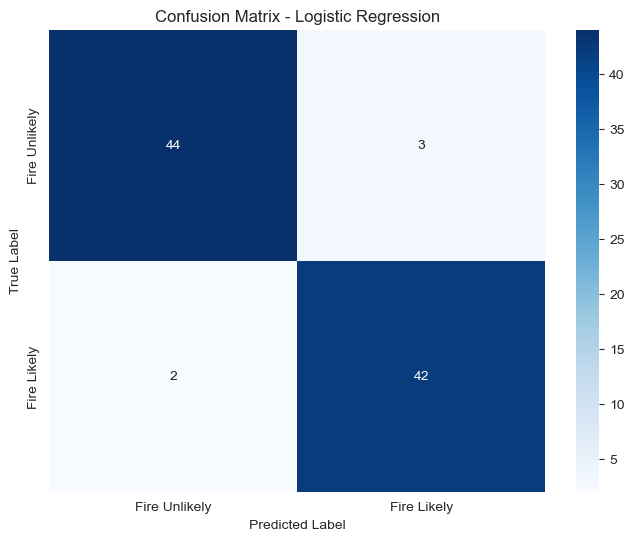

The model has been successfully trained.


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Logistic Regression model with L2 regularization
log_reg = LogisticRegression(penalty='l2', C=1.0)  # Adjust C as needed for stronger or weaker regularization

# Assuming X_train_smote, y_train_smote, X_validate, and y_validate are already defined

# Train the model on the SMOTE-balanced training data
log_reg.fit(X_train_smote, y_train_smote)

# Predict on the validation set using the original (non-SMOTE) validation features
y_pred_val = log_reg.predict(X_validate)
y_pred_proba_val = log_reg.predict_proba(X_validate)[:, 1]

# Calculate evaluation metrics on the validation set
accuracy = accuracy_score(y_validate, y_pred_val)
precision = precision_score(y_validate, y_pred_val)
recall = recall_score(y_validate, y_pred_val)
f1 = f1_score(y_validate, y_pred_val)

# Display the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Calculate the confusion matrix
cm = confusion_matrix(y_validate, y_pred_val)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fire Unlikely', 'Fire Likely'], yticklabels=['Fire Unlikely', 'Fire Likely'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Check if the model has been trained and has coefficients
if hasattr(log_reg, 'coef_'):
    print("The model has been successfully trained.")
else:
    print("The model is not trained yet.")


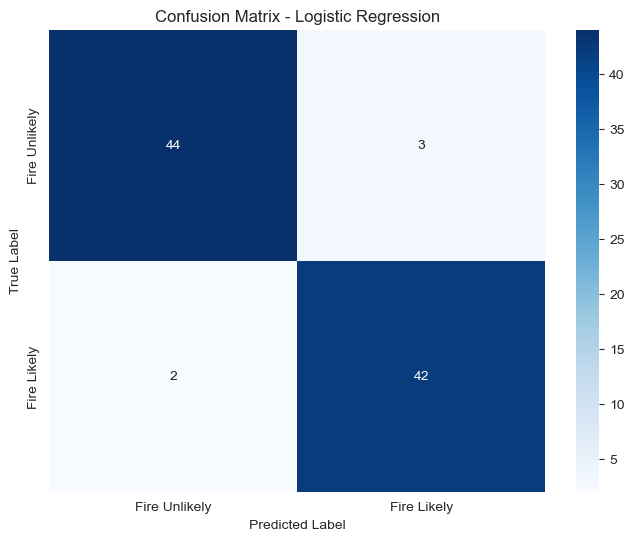

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_validate, y_pred_val)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fire Unlikely', 'Fire Likely'], yticklabels=['Fire Unlikely', 'Fire Likely'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Define the parameter distribution
param_dist = {
    'C': uniform(0.001, 10),  # Uniform distribution over [0.001, 10.001)
    'max_iter': [100, 1000, 2000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Initialize RandomizedSearchCV for Recall
random_search_accuracy = RandomizedSearchCV(LogisticRegression(random_state=42), param_distributions=param_dist, n_iter=100, cv=5,
                                          scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)

# Perform the random search
random_search_accuracy.fit(X_train_smote, y_train_smote)

# Best parameters and score for Recall
print("Best Parameters for Accuracy:", random_search_accuracy.best_params_)
print("Best Cross-Validation Accuracy Score:", random_search_accuracy.best_score_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for Accuracy: {'C': 6.119528947223795, 'max_iter': 1000, 'solver': 'liblinear'}
Best Cross-Validation Accuracy Score: 0.9621621621621623


In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Define the parameter distribution
param_dist = {
    'C': uniform(0.001, 10),  # Uniform distribution over [0.001, 10.001)
    'max_iter': [100, 1000, 2000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Initialize RandomizedSearchCV for Recall
random_search_precision = RandomizedSearchCV(LogisticRegression(random_state=42), param_distributions=param_dist, n_iter=100, cv=5,
                                          scoring='precision', n_jobs=-1, verbose=1, random_state=42)

# Perform the random search
random_search_precision.fit(X_train_smote, y_train_smote)

# Best parameters and score for Recall
print("Best Parameters for Precision:", random_search_precision.best_params_)
print("Best Cross-Validation Precision Score:", random_search_precision.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for Precision: {'C': 0.09297051616629648, 'max_iter': 1000, 'solver': 'newton-cg'}
Best Cross-Validation Precision Score: 0.9551460551460551


In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Adjusted parameter distribution
param_dist_adjusted = {
    'C': uniform(0.001, 1),  # Narrowing down the range for 'C' to [0.001, 1.001)
    'max_iter': [100, 1000, 2000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l1', 'l2']  # Including regularization type as a hyperparameter
}

# Initialize RandomizedSearchCV for Recall
random_search_recall = RandomizedSearchCV(LogisticRegression(random_state=42), param_distributions=param_dist, n_iter=100, cv=5,
                                          scoring='recall', n_jobs=-1, verbose=1, random_state=42)

# Perform the random search
random_search_recall.fit(X_train_smote, y_train_smote)

# Best parameters and score for Recall
print("Best Parameters for Recall:", random_search_recall.best_params_)
print("Best Cross-Validation Recall Score:", random_search_recall.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for Recall: {'C': 6.119528947223795, 'max_iter': 1000, 'solver': 'liblinear'}
Best Cross-Validation Recall Score: 0.972972972972973


In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform


# Adjusted parameter distribution
param_dist_adjusted = {
    'C': uniform(0.001, 5),  # Narrowing down the range for 'C' to [0.001, 1.001)
    'max_iter': [100, 1000, 2000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l1', 'l2']  # Including regularization type as a hyperparameter
}

# Initialize RandomizedSearchCV for Recall
random_search_f1 = RandomizedSearchCV(LogisticRegression(random_state=42), param_distributions=param_dist, n_iter=100, cv=5,
                                          scoring='f1', n_jobs=-1, verbose=1, random_state=42)

# Perform the random search
random_search_f1.fit(X_train_smote, y_train_smote)

# Best parameters and score for f1
print("Best Parameters for Recall:", random_search_f1.best_params_)
print("Best Cross-Validation Recall Score:", random_search_f1.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for Recall: {'C': 6.119528947223795, 'max_iter': 1000, 'solver': 'liblinear'}
Best Cross-Validation Recall Score: 0.9627105567105566


In [46]:
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming X_train, X_validate, y_train, y_validate are already defined
X_train_full = pd.concat([X_train, X_validate])
y_train_full = pd.concat([y_train, y_validate])

# Capping outliers in the combined dataset to 1st and 99th percentiles
for column in X_train_full.select_dtypes(include=np.number).columns:
    lower_percentile = X_train_full[column].quantile(0.01)
    upper_percentile = X_train_full[column].quantile(0.99)
    X_train_full[column] = np.clip(X_train_full[column], lower_percentile, upper_percentile)

# Apply SMOTE to the combined dataset
smote = SMOTE(random_state=42)
X_train_full_smote, y_train_full_smote = smote.fit_resample(X_train_full, y_train_full)

# Use the best parameters for recall obtained from RandomizedSearchCV
best_params_for_recall_random_search = random_search_recall.best_params_

# Train the Logistic Regression model using the best parameters from RandomizedSearchCV
log_reg_full = LogisticRegression(**best_params_for_recall_random_search)
log_reg_full.fit(X_train_full_smote, y_train_full_smote)

# Evaluate the model on the test set using the default threshold
y_pred_test = log_reg_full.predict(X_test)

# Calculate and display the evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, zero_division=0)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")


Evaluation Metrics:
Test Accuracy: 0.9239130434782609
Test Precision: 0.9142857142857143
Test Recall: 0.8888888888888888
Test F1 Score: 0.9014084507042254


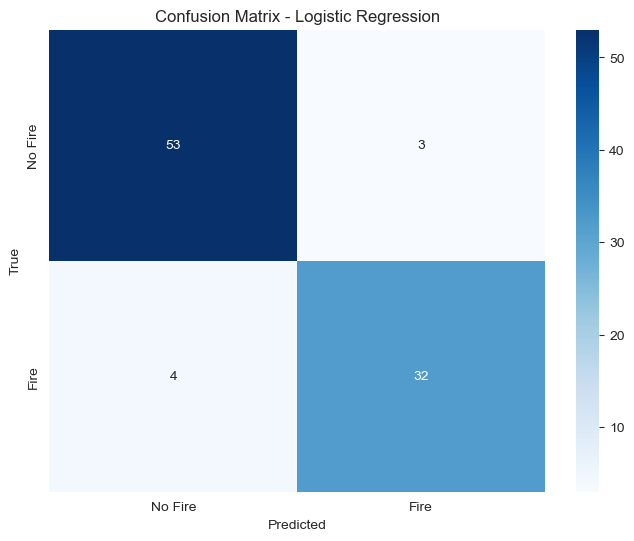

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_test are the predictions and y_test are the actual labels
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [48]:
print("Columns with NaN values in X_train_full:", X_train_full.columns[X_train_full.isnull().any()].tolist())


Columns with NaN values in X_train_full: []


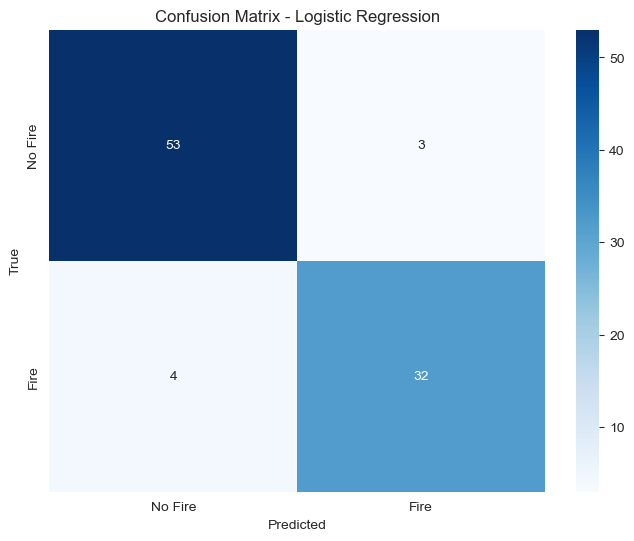

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_test are the predictions and y_test are the actual labels
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [50]:
import pandas as pd

# Assuming 'cm' is the confusion matrix and 'y_test' are the actual labels
conf_matrix_df = pd.DataFrame(cm, 
                              index=['Actual No Fire', 'Actual Fire'], 
                              columns=['Predicted No Fire', 'Predicted Fire'])

conf_matrix_df


,Predicted No Fire,Predicted Fire
Actual No Fire,53,3
Actual Fire,4,32


In [51]:
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Assuming X_train, X_validate, y_train, y_validate are already defined
X_train_full = pd.concat([X_train, X_validate])
y_train_full = pd.concat([y_train, y_validate])


# Apply SMOTE to the combined dataset
smote = SMOTE(random_state=42)
X_train_full_smote, y_train_full_smote = smote.fit_resample(X_train_full, y_train_full)

# Use the best parameters for recall obtained from RandomizedSearchCV
best_params_for_f1_random_search = random_search_f1.best_params_

# Train the Logistic Regression model
log_reg_full = LogisticRegression(**best_params_for_f1_random_search)
log_reg_full.fit(X_train_full_smote, y_train_full_smote)

# Evaluate the model
y_pred_test = log_reg_full.predict(X_test)

# Calculate and display evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, zero_division=0)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")


Evaluation Metrics:
Test Accuracy: 0.9239130434782609
Test Precision: 0.9142857142857143
Test Recall: 0.8888888888888888
Test F1 Score: 0.9014084507042254


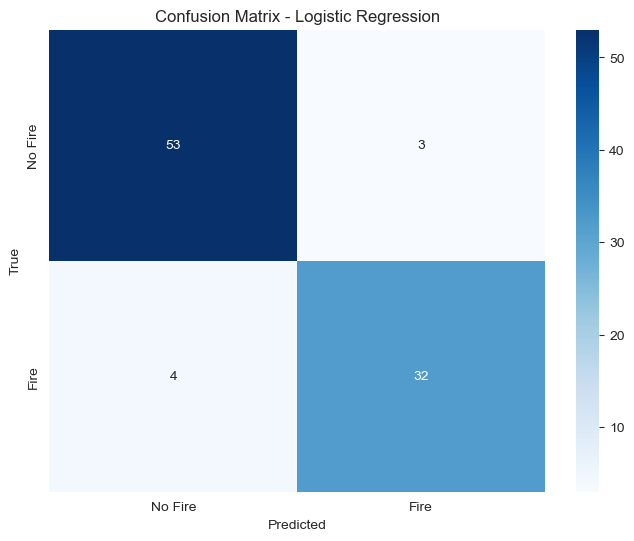

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_test are the predictions and y_test are the actual labels
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [53]:
import pandas as pd

# Assuming 'cm' is the confusion matrix and 'y_test' are the actual labels
conf_matrix_df = pd.DataFrame(cm, 
                              index=['Actual No Fire', 'Actual Fire'], 
                              columns=['Predicted No Fire', 'Predicted Fire'])

conf_matrix_df

,Predicted No Fire,Predicted Fire
Actual No Fire,53,3
Actual Fire,4,32


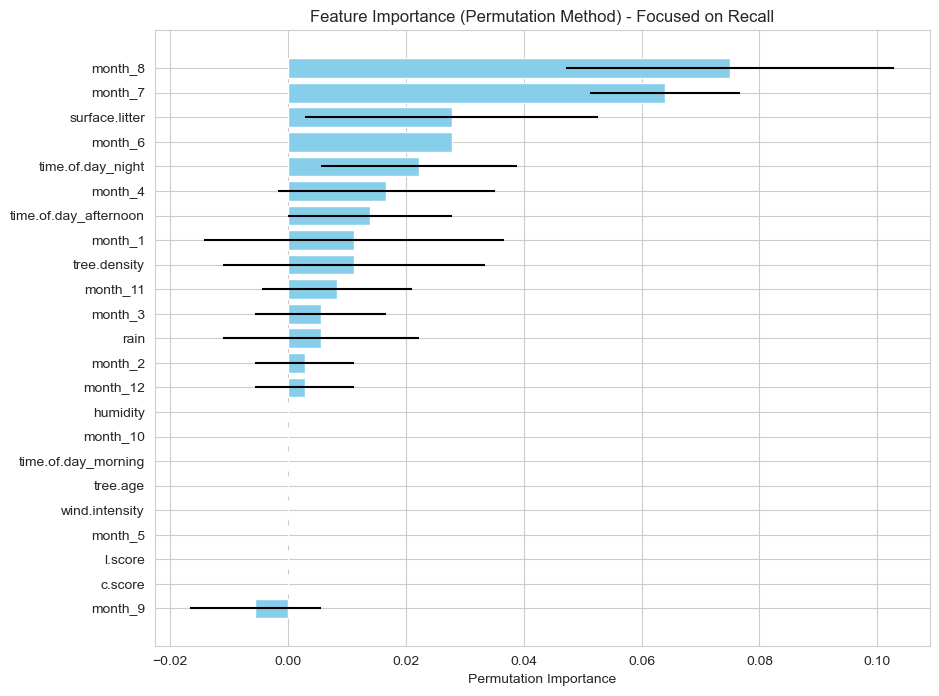

In [54]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'log_reg_full' is your trained Logistic Regression model
# and 'X_test', 'y_test' are your test sets

# Calculate permutation feature importance with recall as the scoring metric
result = permutation_importance(log_reg_full, X_test, y_test, n_repeats=10, random_state=42, scoring='recall')

# Get the importance scores and their standard deviations
importances = result.importances_mean
std = result.importances_std

# Convert the importances into a DataFrame for easier handling
feature_names = X_test.columns
df_importances = pd.DataFrame({'feature': feature_names, 'importance_mean': importances, 'importance_std': std})

# Sort the DataFrame by importance_mean in descending order
df_importances = df_importances.sort_values(by='importance_mean', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(df_importances['feature'], df_importances['importance_mean'], xerr=df_importances['importance_std'], align='center', color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation Method) - Focused on Recall')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


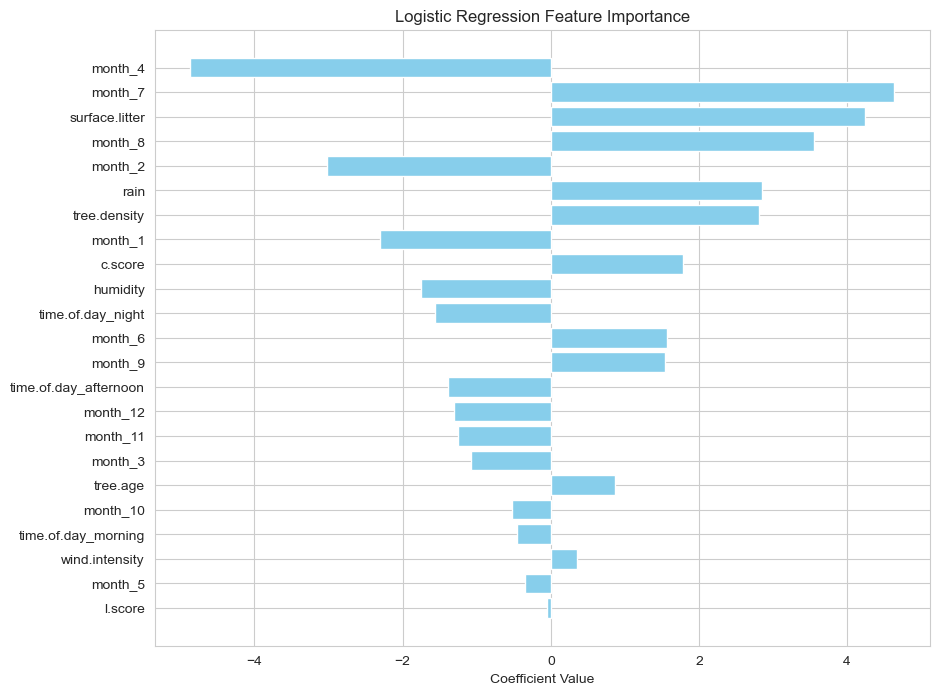

In [55]:
import matplotlib.pyplot as plt

# Extracting the coefficients
feature_names = X_train_full_smote.columns
coefficients = log_reg_full.coef_[0]

# Creating a DataFrame for easier handling
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sorting the DataFrame by the absolute values of the coefficients in descending order
feature_importance_df = feature_importance_df.reindex(feature_importance_df.Coefficient.abs().sort_values(ascending=False).index)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()
